In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = 'F:/FYP project/FYP(Flood)/Real Data/new full data.csv'
df = pd.read_csv(file_path)

print(df)

            Date  Hour  Discharge Rate (cumecs)  Rainfall Data (mm)  \
0     2021-04-01     1                    16.45                 0.0   
1     2021-04-01     2                    16.28                 0.0   
2     2021-04-01     3                    16.12                 0.0   
3     2021-04-01     4                    15.78                 0.0   
4     2021-04-01     5                    15.62                 0.0   
...          ...   ...                      ...                 ...   
2923  2022-05-31    20                   330.99                 1.3   
2924  2022-05-31    21                   327.96                 0.0   
2925  2022-05-31    22                   324.19                 0.0   
2926  2022-05-31    23                   321.94                 0.0   
2927  2022-05-31    24                   318.95                 0.0   

      Water Level (m)  
0                1.00  
1                0.99  
2                0.98  
3                0.96  
4                0.95  
...

Final One- 1 method

Missing values in each column before processing:
Date                         0
Hour                         0
Discharge Rate (cumecs)     11
Rainfall Data (mm)         122
Water Level (m)             11
dtype: int64
Missing values in each column after processing:
Date                       0
Hour                       0
Discharge Rate (cumecs)    0
Rainfall Data (mm)         0
Water Level (m)            0
dtype: int64
Epoch 1/100


C:\Users\Janith\AppData\Local\Temp\ipykernel_40424\383628871.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
c:\Users\Janith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 - 2s - 34ms/step - loss: 5.2518 - mean_absolute_error: 1.7601 - val_loss: 1.1291 - val_mean_absolute_error: 0.8549
Epoch 2/100
64/64 - 0s - 3ms/step - loss: 0.8137 - mean_absolute_error: 0.6451 - val_loss: 0.2409 - val_mean_absolute_error: 0.3090
Epoch 3/100
64/64 - 0s - 3ms/step - loss: 0.5368 - mean_absolute_error: 0.4774 - val_loss: 0.2184 - val_mean_absolute_error: 0.2668
Epoch 4/100
64/64 - 0s - 3ms/step - loss: 0.4711 - mean_absolute_error: 0.4348 - val_loss: 0.1873 - val_mean_absolute_error: 0.2512
Epoch 5/100
64/64 - 0s - 3ms/step - loss: 0.3745 - mean_absolute_error: 0.4035 - val_loss: 0.1779 - val_mean_absolute_error: 0.2410
Epoch 6/100
64/64 - 0s - 3ms/step - loss: 0.3760 - mean_absolute_error: 0.4034 - val_loss: 0.1742 - val_mean_absolute_error: 0.2304
Epoch 7/100
64/64 - 0s - 3ms/step - loss: 0.3560 - mean_absolute_error: 0.3874 - val_loss: 0.1846 - val_mean_absolute_error: 0.2269
Epoch 8/100
64/64 - 0s - 3ms/step - loss: 0.3399 - mean_absolute_error: 0.3728 - val_lo

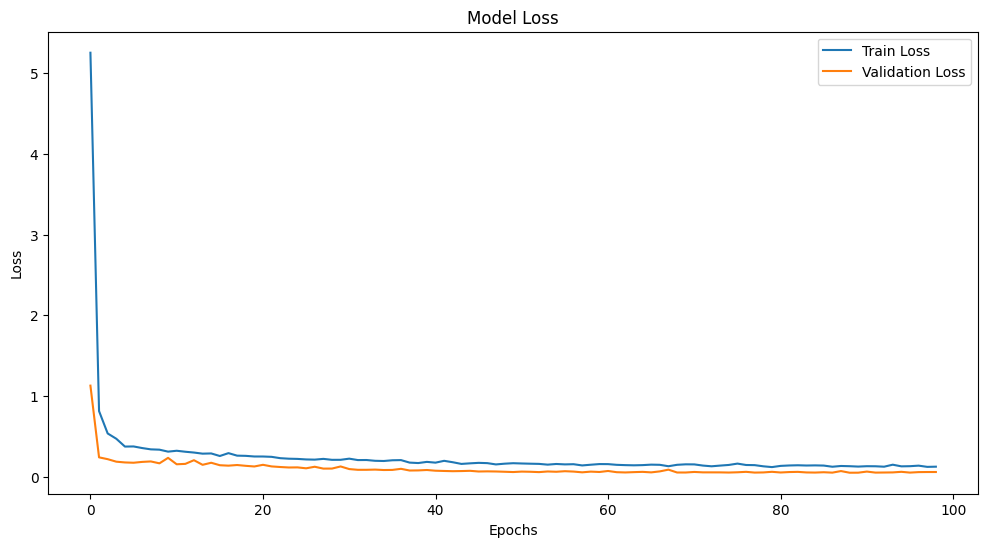

   Actual (Next 1st hour)  Predicted (Next 1st hour)  Actual (Next 2nd hour)  \
0                    2.20                       2.21                    2.15   
1                    1.04                       1.01                    1.02   
2                    2.40                       2.35                    2.28   
3                    2.18                       2.12                    2.09   
4                    3.67                       3.65                    3.67   
5                    0.88                       0.89                    0.84   
6                    7.27                       7.23                    7.38   
7                    3.30                       3.19                    3.37   
8                    2.42                       2.36                    2.30   
9                    5.43                       5.48                    5.23   

   Predicted (Next 2nd hour)  Actual (Next 3rd hour)  \
0                       2.20                    2.12   
1      

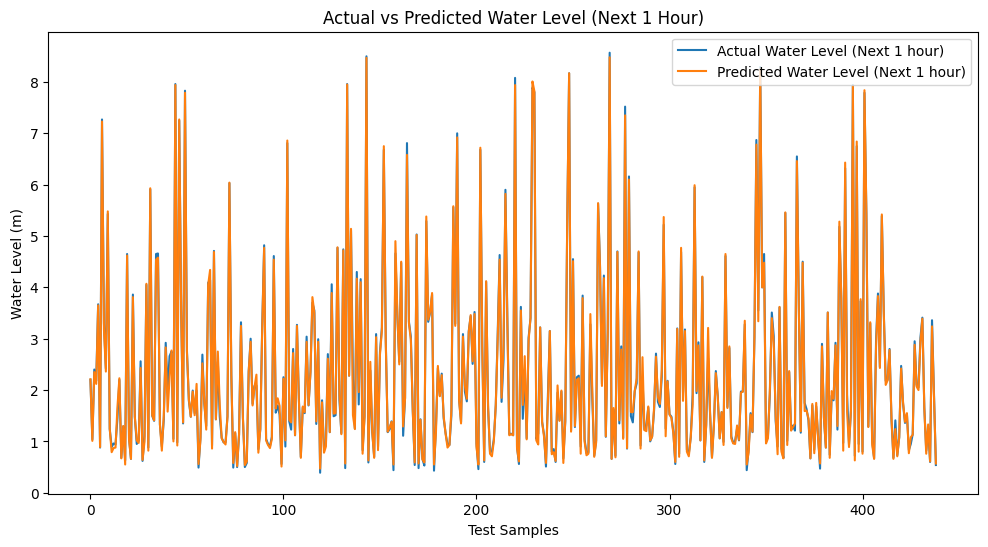

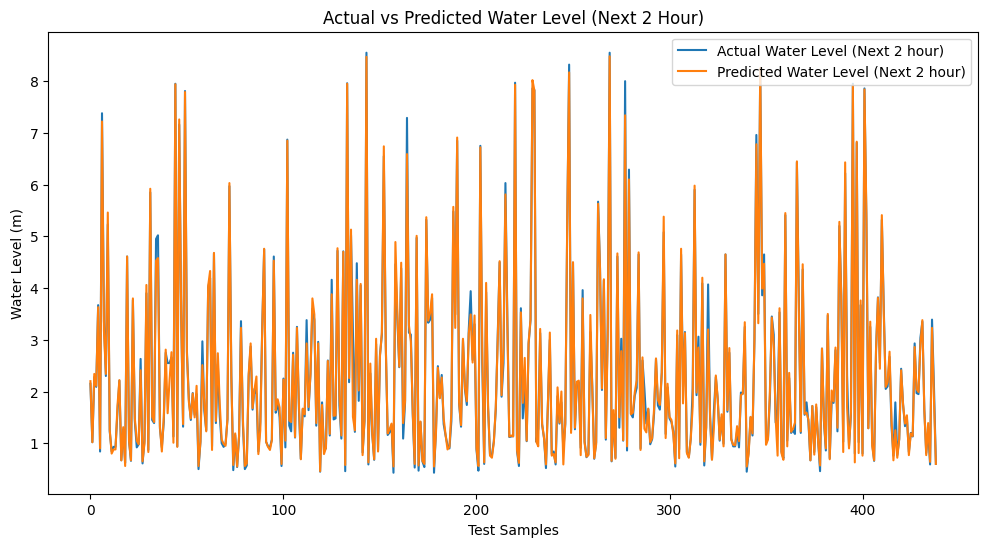

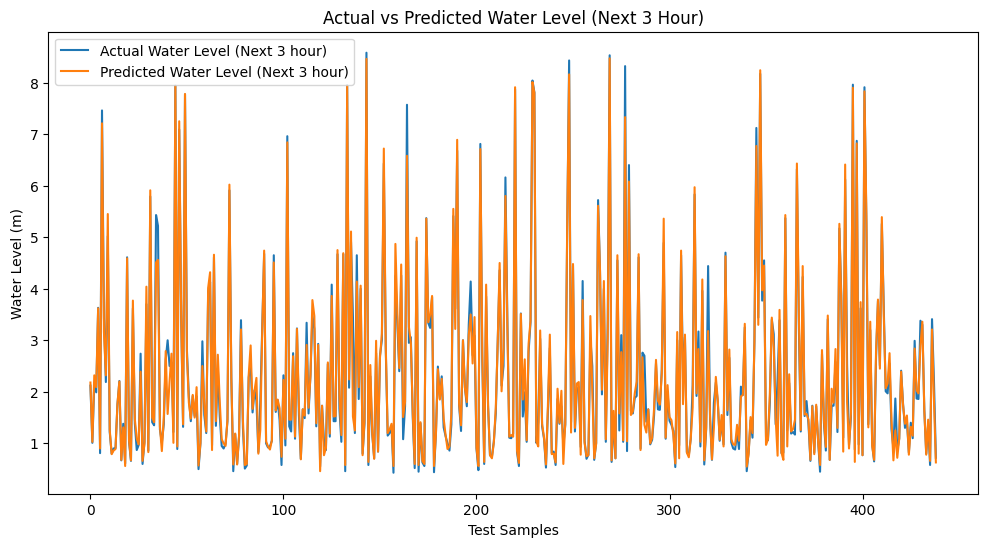

Mean Absolute Error for 1st hour prediction: 0.06
Mean Absolute Error for 2nd hour prediction: 0.10
Mean Absolute Error for 3rd hour prediction: 0.15


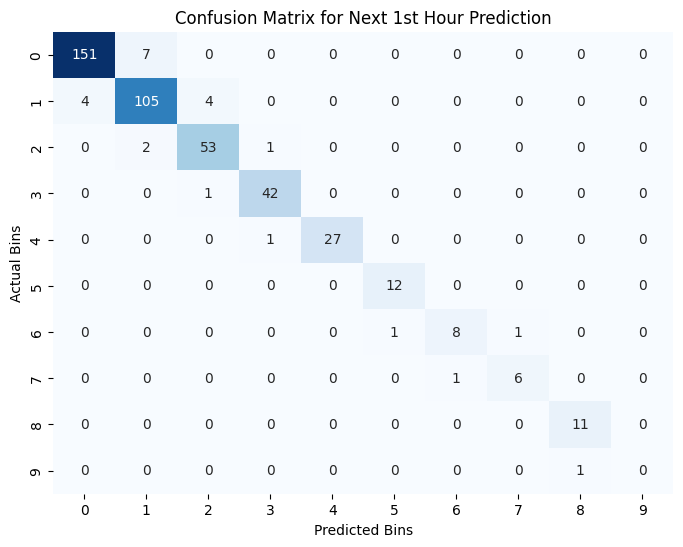

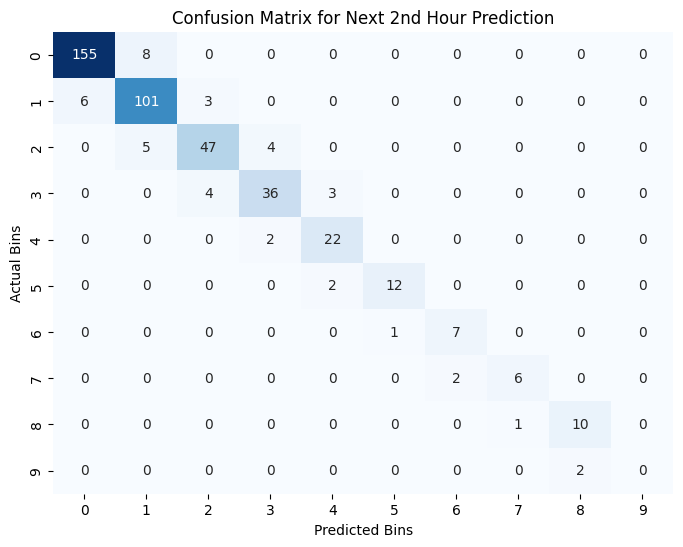

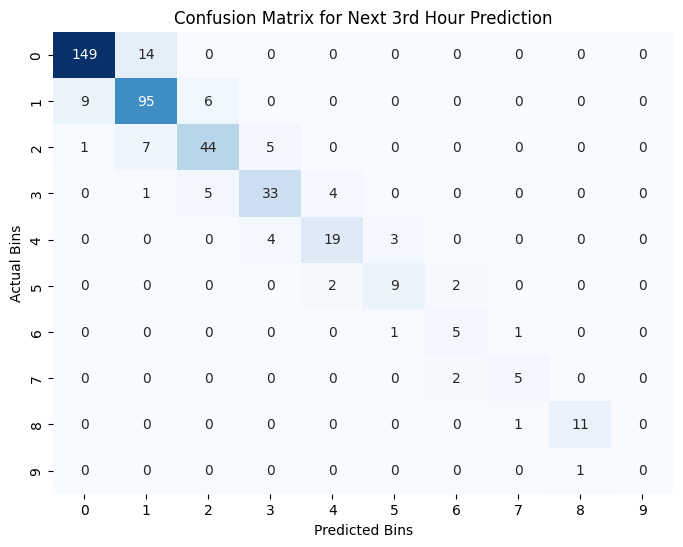

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
import seaborn as sns


# Load the dataset
file_path = 'F:/FYP project/FYP(Flood)/Real Data/new full data.csv'
df = pd.read_csv(file_path)

# Check for null values
print("Missing values in each column before processing:")
print(df.isnull().sum())

# Method 1: Forward Fill (propagate last valid observation forward to fill nulls)
df.fillna(method='ffill', inplace=True)

# Method 2: Interpolation (optional, if you want to interpolate instead of forward fill)
# df.interpolate(method='linear', inplace=True)

# Recheck for null values after filling
print("Missing values in each column after processing:")
print(df.isnull().sum())

# Extract input features and target (Water Level for next 1st, 2nd, 3rd hours)
X = df[['Discharge Rate (cumecs)', 'Rainfall Data (mm)', 'Water Level (m)']].values
y = np.array([df['Water Level (m)'].shift(-i) for i in range(1, 4)]).T[:-3]

# Remove the last three rows since they don't have the target data
X = X[:-3]

# Prepare data using 3 rows (time steps) as input to predict next 3 hours
def create_sequences(X, y, time_steps=3):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps), :])
        ys.append(y[i + time_steps - 1])
    return np.array(Xs), np.array(ys)

time_steps = 3
X_seq, y_seq = create_sequences(X, y, time_steps)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[2])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)

# Build LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='linear'))  # 3 outputs for 1st, 2nd, and 3rd hour predictions

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val), 
                    callbacks=[early_stop], verbose=2)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Round the predictions to 2 decimal places
y_pred = np.round(y_pred, 2)
y_test = np.round(y_test, 2)

# Calculate accuracy for each hour's prediction
def calculate_accuracy(y_true, y_pred, threshold=0.1):
    """Calculate accuracy by checking if predicted values are within a threshold of actual values."""
    return np.mean(np.abs(y_true - y_pred) <= threshold)

accuracy_1st_hour = calculate_accuracy(y_test[:, 0], y_pred[:, 0])
accuracy_2nd_hour = calculate_accuracy(y_test[:, 1], y_pred[:, 1])
accuracy_3rd_hour = calculate_accuracy(y_test[:, 2], y_pred[:, 2])

print(f"Accuracy for 1st hour prediction: {accuracy_1st_hour * 100:.2f}%")
print(f"Accuracy for 2nd hour prediction: {accuracy_2nd_hour * 100:.2f}%")
print(f"Accuracy for 3rd hour prediction: {accuracy_3rd_hour * 100:.2f}%")

# Create confusion matrices for each hour's prediction
def create_confusion_matrix(y_true, y_pred, threshold=0.1):
    """Create confusion matrix based on whether predictions are within the threshold."""
    y_true_binary = (y_true > np.mean(y_true)).astype(int)
    y_pred_binary = (y_pred > np.mean(y_pred)).astype(int)
    return confusion_matrix(y_true_binary, y_pred_binary)

conf_matrix_1st_hour = create_confusion_matrix(y_test[:, 0], y_pred[:, 0])
conf_matrix_2nd_hour = create_confusion_matrix(y_test[:, 1], y_pred[:, 1])
conf_matrix_3rd_hour = create_confusion_matrix(y_test[:, 2], y_pred[:, 2])

# Plot loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Comparing actual vs predicted for first 10 values
comparison_df = pd.DataFrame({
    'Actual (Next 1st hour)': y_test[:, 0],
    'Predicted (Next 1st hour)': y_pred[:, 0],
    'Actual (Next 2nd hour)': y_test[:, 1],
    'Predicted (Next 2nd hour)': y_pred[:, 1],
    'Actual (Next 3rd hour)': y_test[:, 2],
    'Predicted (Next 3rd hour)': y_pred[:, 2]
})

print(comparison_df.head(10))

# Plot actual vs predicted for each of the next 3 hours
for i in range(3):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test[:, i], label=f'Actual Water Level (Next {i+1} hour)')
    plt.plot(y_pred[:, i], label=f'Predicted Water Level (Next {i+1} hour)')
    plt.title(f'Actual vs Predicted Water Level (Next {i+1} Hour)')
    plt.xlabel('Test Samples')
    plt.ylabel('Water Level (m)')
    plt.legend()
    plt.show()

# Calculate and display MAE for each hour prediction
mae_1st_hour = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mae_2nd_hour = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mae_3rd_hour = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

print(f'Mean Absolute Error for 1st hour prediction: {mae_1st_hour:.2f}')
print(f'Mean Absolute Error for 2nd hour prediction: {mae_2nd_hour:.2f}')
print(f'Mean Absolute Error for 3rd hour prediction: {mae_3rd_hour:.2f}')

# Create confusion matrices by binning the actual and predicted values into ranges
def create_binned_confusion_matrix(y_true, y_pred, hour):
    bins = np.linspace(min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max()), 10)  # Create 10 bins
    y_true_binned = np.digitize(y_true, bins)
    y_pred_binned = np.digitize(y_pred, bins)
    
    conf_matrix = confusion_matrix(y_true_binned, y_pred_binned)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for Next {hour} Hour Prediction')
    plt.xlabel('Predicted Bins')
    plt.ylabel('Actual Bins')
    plt.show()

# Generate confusion matrices for next 1st, 2nd, and 3rd hour predictions
create_binned_confusion_matrix(y_test[:, 0], y_pred[:, 0], '1st')
create_binned_confusion_matrix(y_test[:, 1], y_pred[:, 1], '2nd')
create_binned_confusion_matrix(y_test[:, 2], y_pred[:, 2], '3rd')


Final one - 2 method

Missing values in each column before processing:
Date                         0
Hour                         0
Discharge Rate (cumecs)     11
Rainfall Data (mm)         122
Water Level (m)             11
dtype: int64
Missing values in each column after processing:
Date                       0
Hour                       0
Discharge Rate (cumecs)    0
Rainfall Data (mm)         0
Water Level (m)            0
dtype: int64
Epoch 1/100


C:\Users\Janith\AppData\Local\Temp\ipykernel_40424\799576420.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
c:\Users\Janith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 - 2s - 31ms/step - loss: 4.9071 - mean_absolute_error: 1.7168 - val_loss: 1.3523 - val_mean_absolute_error: 0.9566
Epoch 2/100
64/64 - 0s - 3ms/step - loss: 0.7964 - mean_absolute_error: 0.6250 - val_loss: 0.2180 - val_mean_absolute_error: 0.2851
Epoch 3/100
64/64 - 0s - 2ms/step - loss: 0.4437 - mean_absolute_error: 0.4331 - val_loss: 0.1938 - val_mean_absolute_error: 0.2550
Epoch 4/100
64/64 - 0s - 2ms/step - loss: 0.3755 - mean_absolute_error: 0.4009 - val_loss: 0.1878 - val_mean_absolute_error: 0.2526
Epoch 5/100
64/64 - 0s - 2ms/step - loss: 0.3949 - mean_absolute_error: 0.3993 - val_loss: 0.2047 - val_mean_absolute_error: 0.2429
Epoch 6/100
64/64 - 0s - 2ms/step - loss: 0.3432 - mean_absolute_error: 0.3799 - val_loss: 0.2169 - val_mean_absolute_error: 0.2525
Epoch 7/100
64/64 - 0s - 3ms/step - loss: 0.3340 - mean_absolute_error: 0.3662 - val_loss: 0.1686 - val_mean_absolute_error: 0.2258
Epoch 8/100
64/64 - 0s - 2ms/step - loss: 0.3205 - mean_absolute_error: 0.3610 - val_lo

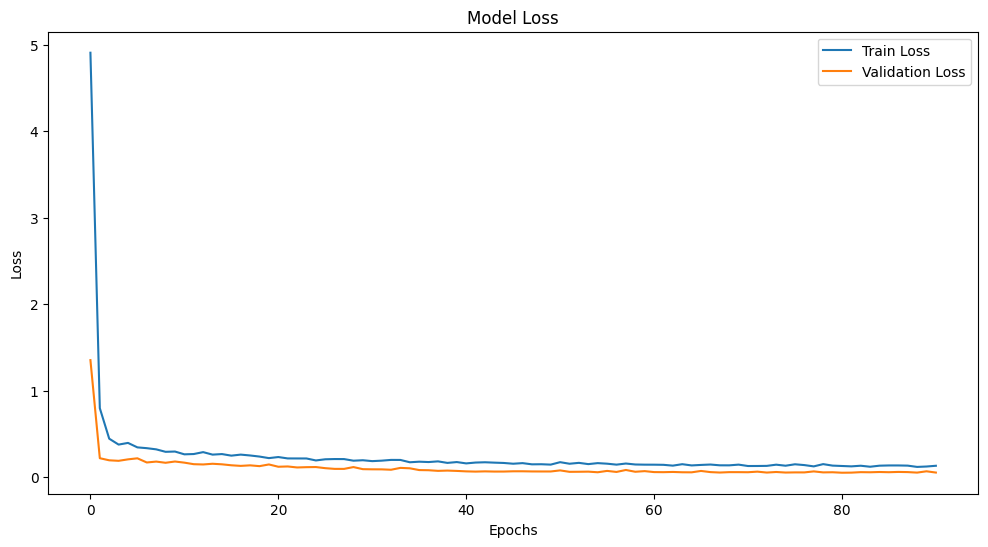

   Actual (Next 1st hour)  Predicted (Next 1st hour)  Actual (Next 2nd hour)  \
0                    2.20                       2.21                    2.15   
1                    1.04                       1.04                    1.02   
2                    2.40                       2.36                    2.28   
3                    2.18                       2.13                    2.09   
4                    3.67                       3.64                    3.67   
5                    0.88                       0.92                    0.84   
6                    7.27                       7.16                    7.38   
7                    3.30                       3.19                    3.37   
8                    2.42                       2.36                    2.30   
9                    5.43                       5.43                    5.23   

   Predicted (Next 2nd hour)  Actual (Next 3rd hour)  \
0                       2.20                    2.12   
1      

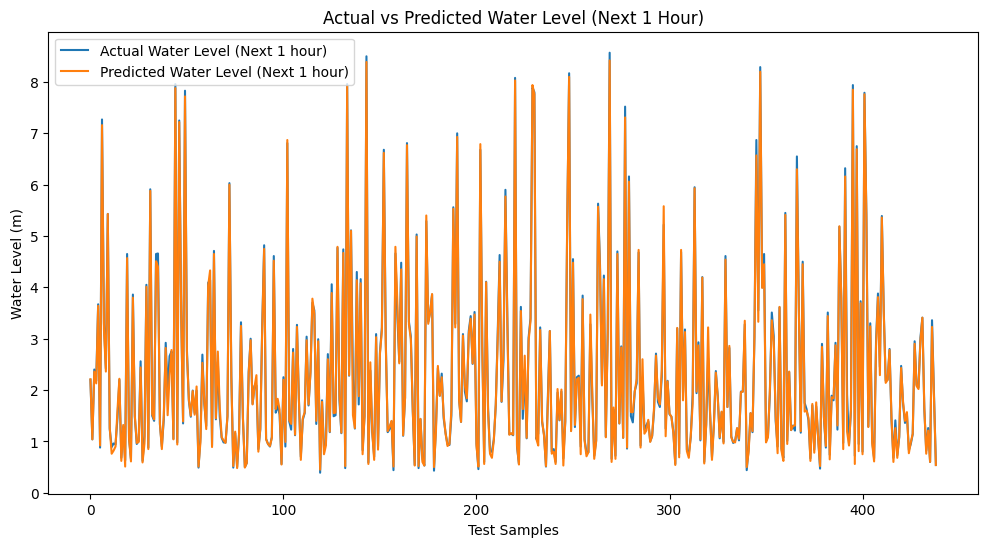

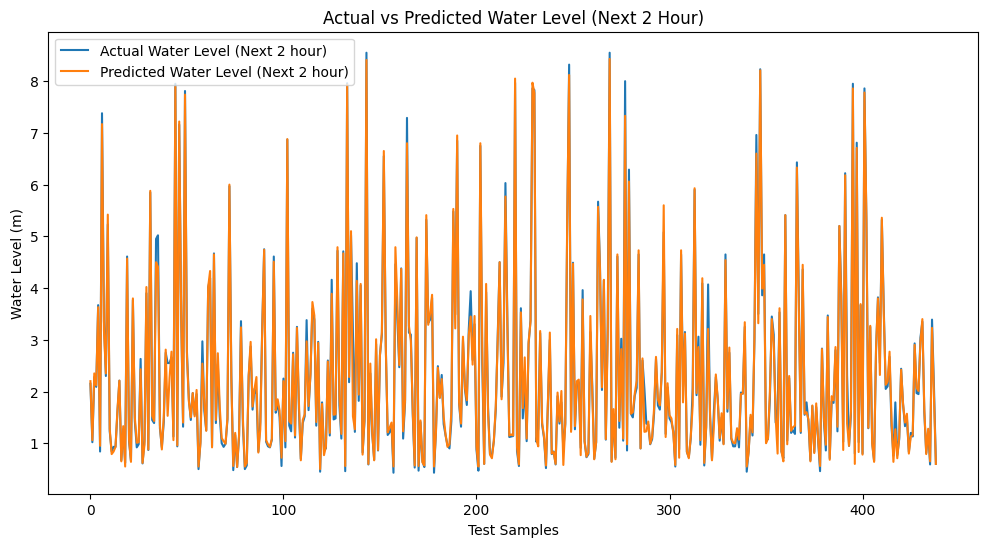

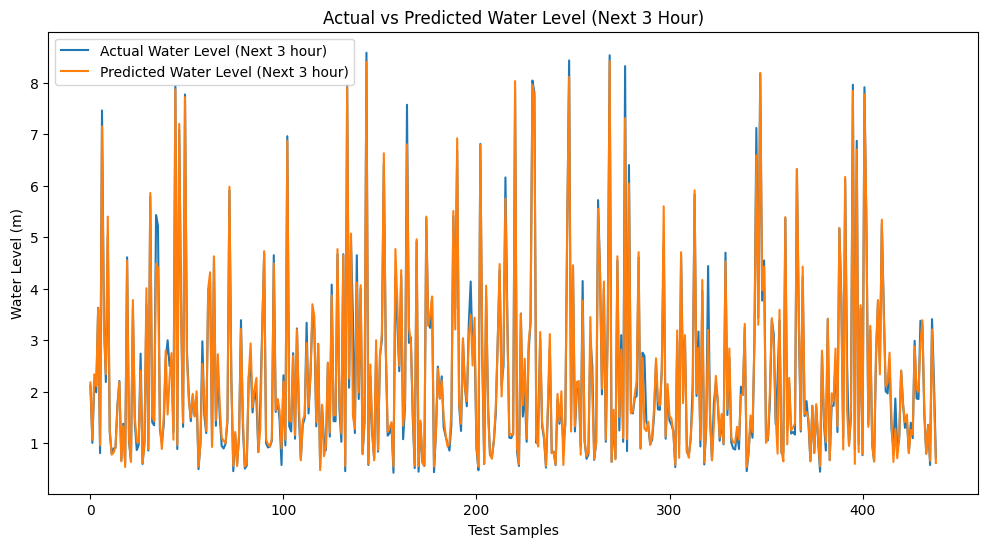

Mean Absolute Error for 1st hour prediction: 0.06
Mean Absolute Error for 2nd hour prediction: 0.10
Mean Absolute Error for 3rd hour prediction: 0.15


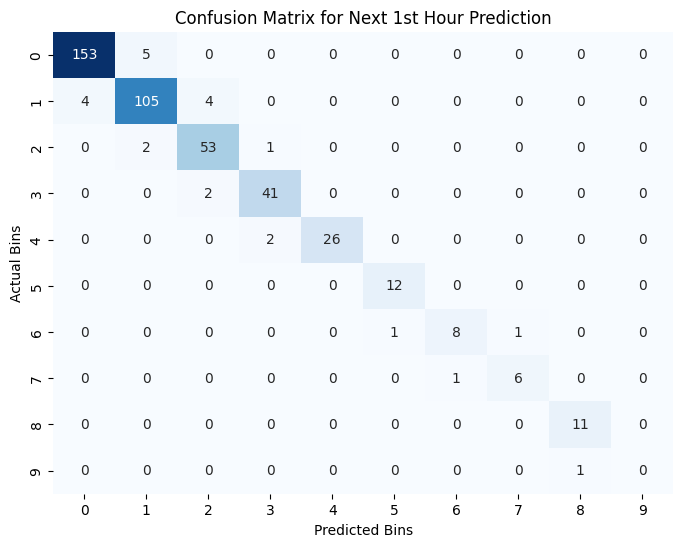

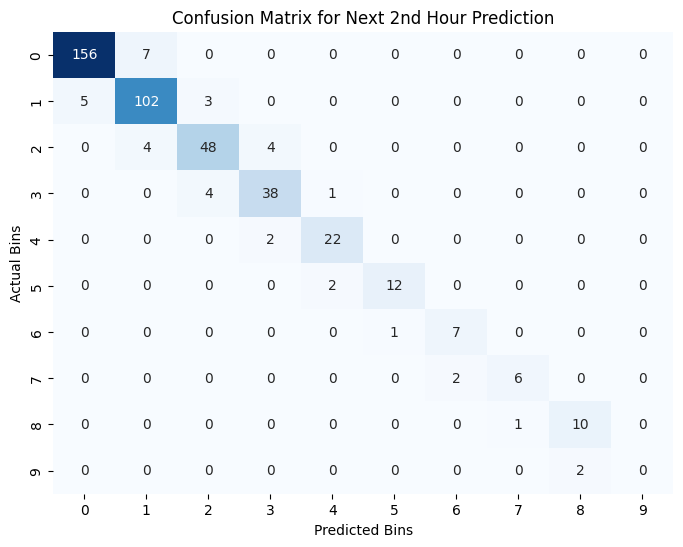

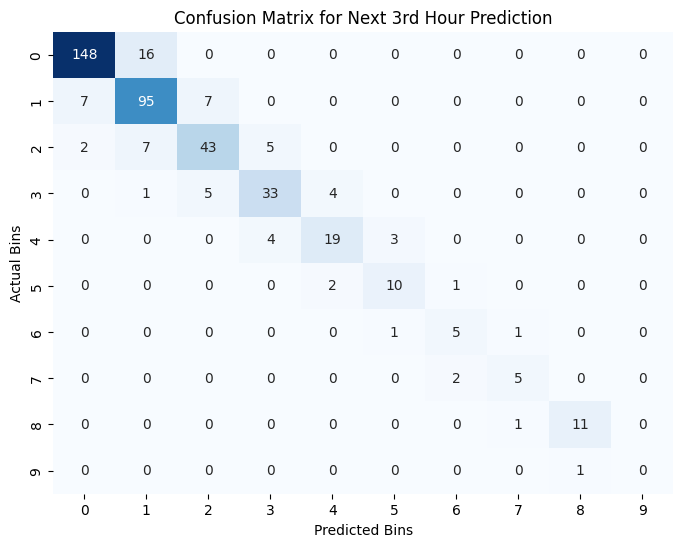

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
import seaborn as sns


# Load the dataset
file_path = 'F:/FYP project/FYP(Flood)/Real Data/new full data.csv'
df = pd.read_csv(file_path)

# Check for null values
print("Missing values in each column before processing:")
print(df.isnull().sum())

# Method 2: Interpolation (optional, if you want to interpolate instead of forward fill)
df.interpolate(method='linear', inplace=True)

# Recheck for null values after filling
print("Missing values in each column after processing:")
print(df.isnull().sum())

# Extract input features and target (Water Level for next 1st, 2nd, 3rd hours)
X = df[['Discharge Rate (cumecs)', 'Rainfall Data (mm)', 'Water Level (m)']].values
y = np.array([df['Water Level (m)'].shift(-i) for i in range(1, 4)]).T[:-3]

# Remove the last three rows since they don't have the target data
X = X[:-3]

# Prepare data using 3 rows (time steps) as input to predict next 3 hours
def create_sequences(X, y, time_steps=3):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps), :])
        ys.append(y[i + time_steps - 1])
    return np.array(Xs), np.array(ys)

time_steps = 3
X_seq, y_seq = create_sequences(X, y, time_steps)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[2])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)

# Build LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='linear'))  # 3 outputs for 1st, 2nd, and 3rd hour predictions

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val), 
                    callbacks=[early_stop], verbose=2)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Round the predictions to 2 decimal places
y_pred = np.round(y_pred, 2)
y_test = np.round(y_test, 2)

# Calculate accuracy for each hour's prediction
def calculate_accuracy(y_true, y_pred, threshold=0.1):
    """Calculate accuracy by checking if predicted values are within a threshold of actual values."""
    return np.mean(np.abs(y_true - y_pred) <= threshold)

accuracy_1st_hour = calculate_accuracy(y_test[:, 0], y_pred[:, 0])
accuracy_2nd_hour = calculate_accuracy(y_test[:, 1], y_pred[:, 1])
accuracy_3rd_hour = calculate_accuracy(y_test[:, 2], y_pred[:, 2])

print(f"Accuracy for 1st hour prediction: {accuracy_1st_hour * 100:.2f}%")
print(f"Accuracy for 2nd hour prediction: {accuracy_2nd_hour * 100:.2f}%")
print(f"Accuracy for 3rd hour prediction: {accuracy_3rd_hour * 100:.2f}%")

# Create confusion matrices for each hour's prediction
def create_confusion_matrix(y_true, y_pred, threshold=0.1):
    """Create confusion matrix based on whether predictions are within the threshold."""
    y_true_binary = (y_true > np.mean(y_true)).astype(int)
    y_pred_binary = (y_pred > np.mean(y_pred)).astype(int)
    return confusion_matrix(y_true_binary, y_pred_binary)

conf_matrix_1st_hour = create_confusion_matrix(y_test[:, 0], y_pred[:, 0])
conf_matrix_2nd_hour = create_confusion_matrix(y_test[:, 1], y_pred[:, 1])
conf_matrix_3rd_hour = create_confusion_matrix(y_test[:, 2], y_pred[:, 2])

# Plot loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Comparing actual vs predicted for first 10 values
comparison_df = pd.DataFrame({
    'Actual (Next 1st hour)': y_test[:, 0],
    'Predicted (Next 1st hour)': y_pred[:, 0],
    'Actual (Next 2nd hour)': y_test[:, 1],
    'Predicted (Next 2nd hour)': y_pred[:, 1],
    'Actual (Next 3rd hour)': y_test[:, 2],
    'Predicted (Next 3rd hour)': y_pred[:, 2]
})

print(comparison_df.head(10))

# Plot actual vs predicted for each of the next 3 hours
for i in range(3):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test[:, i], label=f'Actual Water Level (Next {i+1} hour)')
    plt.plot(y_pred[:, i], label=f'Predicted Water Level (Next {i+1} hour)')
    plt.title(f'Actual vs Predicted Water Level (Next {i+1} Hour)')
    plt.xlabel('Test Samples')
    plt.ylabel('Water Level (m)')
    plt.legend()
    plt.show()

# Calculate and display MAE for each hour prediction
mae_1st_hour = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mae_2nd_hour = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mae_3rd_hour = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

print(f'Mean Absolute Error for 1st hour prediction: {mae_1st_hour:.2f}')
print(f'Mean Absolute Error for 2nd hour prediction: {mae_2nd_hour:.2f}')
print(f'Mean Absolute Error for 3rd hour prediction: {mae_3rd_hour:.2f}')

# Create confusion matrices by binning the actual and predicted values into ranges
def create_binned_confusion_matrix(y_true, y_pred, hour):
    bins = np.linspace(min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max()), 10)  # Create 10 bins
    y_true_binned = np.digitize(y_true, bins)
    y_pred_binned = np.digitize(y_pred, bins)
    
    conf_matrix = confusion_matrix(y_true_binned, y_pred_binned)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for Next {hour} Hour Prediction')
    plt.xlabel('Predicted Bins')
    plt.ylabel('Actual Bins')
    plt.show()

# Generate confusion matrices for next 1st, 2nd, and 3rd hour predictions
create_binned_confusion_matrix(y_test[:, 0], y_pred[:, 0], '1st')
create_binned_confusion_matrix(y_test[:, 1], y_pred[:, 1], '2nd')
create_binned_confusion_matrix(y_test[:, 2], y_pred[:, 2], '3rd')
